In [236]:
from matplotlib import pyplot
from fuzzylogic.classes import Domain, Rule
from fuzzylogic.functions import sigmoid, triangular_sigmoid, gauss, inv
from fuzzylogic.hedges import very

In [237]:
pyplot.rc("figure", figsize=(10, 10))

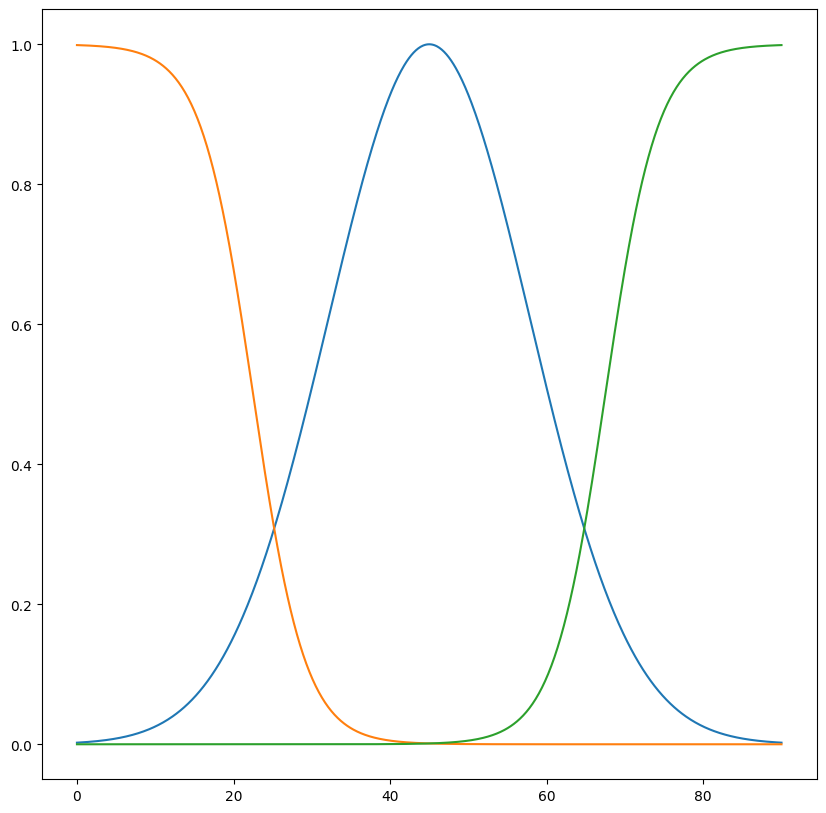

In [238]:
color = Domain("color", 0, 90, res=0.1)

color.green = inv(sigmoid(1, 0.3, 22.5))
color.yellow = gauss(45, 0.003)
color.red = sigmoid(1, 0.3, 67.5)

color.yellow.plot()
color.green.plot()
color.red.plot()

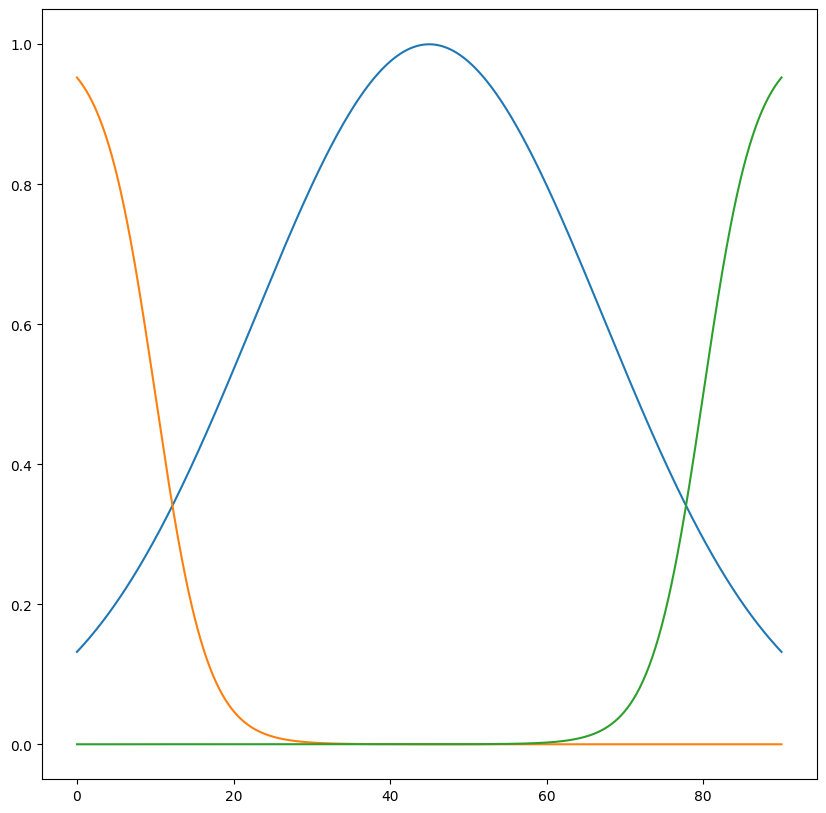

In [239]:
softness = Domain("softness", 0, 90, res=0.1)

softness.hard = inv(sigmoid(1, 0.3, 10))
softness.medium = gauss(45, 0.001)
softness.soft = sigmoid(1, 0.3, 80)

softness.medium.plot()
softness.hard.plot()
softness.soft.plot()

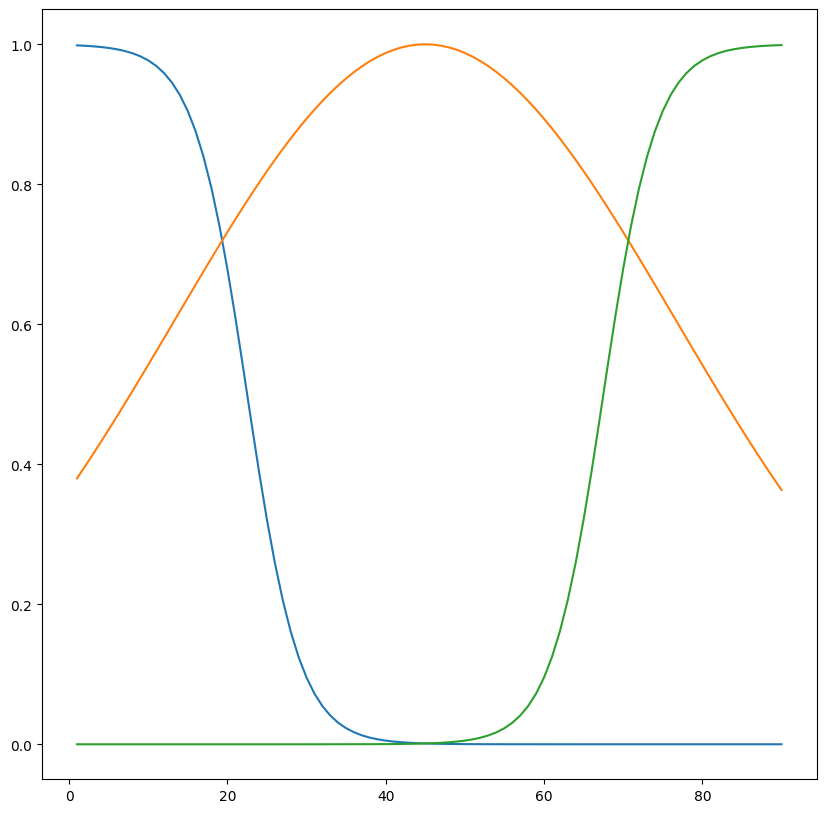

In [249]:
results = Domain("Dojrzalosc", 1, 90)

# results.niedojrzaly = R(1, 30)
# results.dojrzaly = R(31, 60)
# results.przejrzaly = R(61, 90)

results.niedojrzaly = inv(sigmoid(1, 0.3, 22.5))
results.dojrzaly = gauss(45, 0.0005)
results.przejrzaly = sigmoid(1, 0.3, 67.5)

results.niedojrzaly.plot()
results.dojrzaly.plot()
results.przejrzaly.plot()


In [250]:
rules = Rule({
    (color.green, softness.hard): very(results.niedojrzaly),
    (color.green, softness.medium): results.niedojrzaly,
    (color.green, softness.soft): results.niedojrzaly,
    (color.yellow, softness.hard): results.niedojrzaly,
    (color.yellow, softness.medium): results.dojrzaly,
    (color.yellow, softness.soft): results.dojrzaly,
    (color.red, softness.hard): very(results.dojrzaly),
    (color.red, softness.medium): results.przejrzaly,
    (color.red, softness.soft): very(results.przejrzaly),
})


In [255]:
values = {color: 90, softness: 90}
result_value = rules(values)
result = results(result_value)

print(result[0])

KeyError: 0

In [252]:
softness(45)

{Set(<function inv.<locals>.f at 0x118b432e0>): 2.7535691114688454e-05,
 Set(<function gauss.<locals>.f at 0x118b43370>): 1.0,
 Set(<function sigmoid.<locals>.f at 0x118b439a0>): 2.7535691114583473e-05}